# Random Forest Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [2]:
df= pd.read_csv('./Dataset/Delivery_Logistics.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [3]:
print("Shape:", df.shape)
display(df.head())

print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- Data Types ---")
print(df.dtypes)

display(df.describe())

Shape: (25000, 13)


,delivery_id,delivery_partner,package_type,vehicle_type,delivery_mode,region,weather_condition,distance_km,package_weight_kg,delayed,delivery_status,delivery_rating,delivery_cost
0,250.99,delhivery,automobile parts,bike,same day,west,clear,297.0,46.96,no,delivered,3,1632.7206
1,250.99,xpressbees,cosmetics,ev van,express,central,cold,89.6,47.39,no,delivered,5,640.1700
2,250.99,shadowfax,groceries,truck,two day,east,rainy,273.5,26.89,no,delivered,4,1448.1700
3,250.99,dhl,electronics,ev van,same day,east,cold,269.7,12.69,no,delivered,3,1486.5700
4,250.99,dhl,clothing,van,two day,north,foggy,256.7,37.02,no,delivered,4,1394.5600



--- Missing Values ---
delivery_id          0
delivery_partner     0
package_type         0
vehicle_type         0
delivery_mode        0
region               0
weather_condition    0
distance_km          0
package_weight_kg    0
delayed              0
delivery_status      0
delivery_rating      0
delivery_cost        0
dtype: int64

--- Data Types ---
delivery_id          float64
delivery_partner      object
package_type          object
vehicle_type          object
delivery_mode         object
region                object
weather_condition     object
distance_km          float64
package_weight_kg    float64
delayed               object
delivery_status       object
delivery_rating        int64
delivery_cost        float64
dtype: object


,delivery_id,distance_km,package_weight_kg,delivery_rating,delivery_cost
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,12500.500000,150.390436,25.145898,3.666000,864.944579
std,7212.732314,86.409745,14.368663,1.149964,435.712593
min,250.990000,3.600000,0.670000,1.000000,95.667400
25%,6250.750000,75.900000,12.680000,3.000000,490.800000
50%,12500.500000,151.000000,25.145000,4.000000,867.535000
75%,18750.250000,224.900000,37.660000,5.000000,1237.910000
max,24750.010000,297.100000,49.520000,5.000000,1632.720600


## Outliers

In [4]:
def detect_outliers_iqr(dataframe):
    numeric_cols = dataframe.select_dtypes(include=np.number).columns
    outlier_summary = {}

    for col in numeric_cols:
        Q1 = dataframe[col].quantile(0.25)
        Q3 = dataframe[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        mask = (dataframe[col] < lower) | (dataframe[col] > upper)
        outlier_summary[col] = mask.sum()

        print(f"{col}: {mask.sum()} outliers found")

    return outlier_summary

print("\n--- Outlier Summary ---")
outliers = detect_outliers_iqr(df)

numeric_cols = df.select_dtypes(include=np.number).columns


--- Outlier Summary ---
delivery_id: 0 outliers found
distance_km: 0 outliers found
package_weight_kg: 0 outliers found
delivery_rating: 0 outliers found
delivery_cost: 0 outliers found


## Boxplot

C:\Users\Sarvesh Ram Kumar\AppData\Local\Temp\ipykernel_16536\4231670801.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df[cols], labels=cols, showfliers=False)


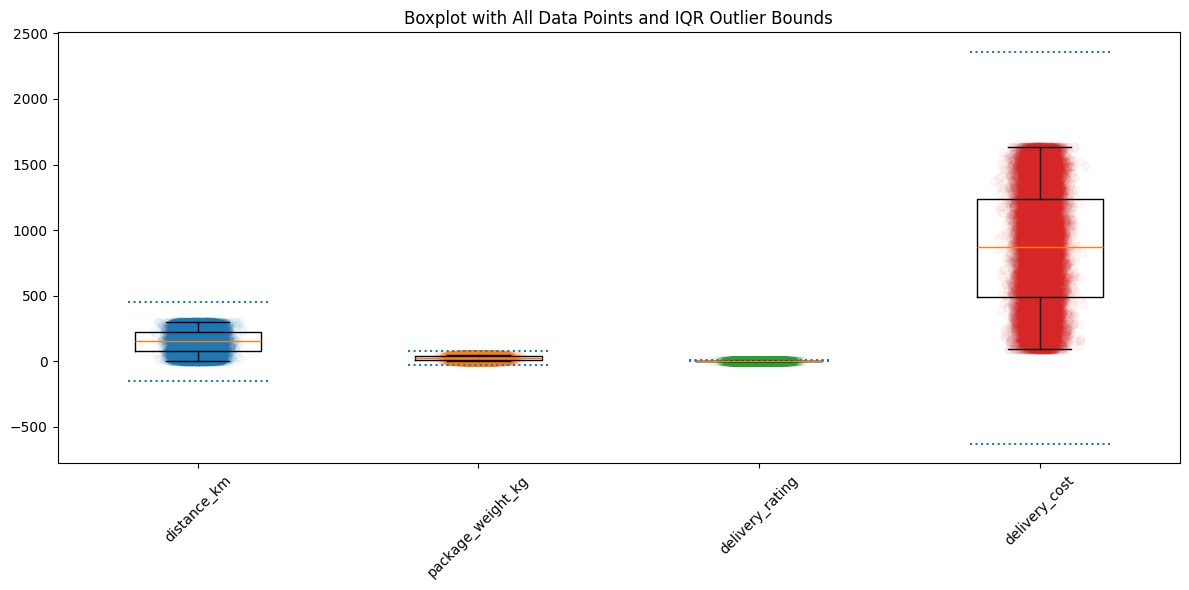

In [9]:
import numpy as np
import matplotlib.pyplot as plt

cols = ["distance_km", "package_weight_kg", "delivery_rating", "delivery_cost"]

plt.figure(figsize=(12, 6))

# Boxplot
plt.boxplot(df[cols], labels=cols, showfliers=False)

for i, col in enumerate(cols, start=1):
    y = df[col]

    # Jittered points
    x = np.random.normal(i, 0.04, size=len(y))
    plt.scatter(x, y, alpha=0.03)

    # Quartiles and IQR
    q1 = y.quantile(0.25)
    q3 = y.quantile(0.75)
    iqr = q3 - q1

    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    # Plot IQR bounds (outlier thresholds)
    plt.hlines(lower, i - 0.25, i + 0.25, linestyles='dotted')
    plt.hlines(upper, i - 0.25, i + 0.25, linestyles='dotted')

plt.title("Boxplot with All Data Points and IQR Outlier Bounds")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Distribution

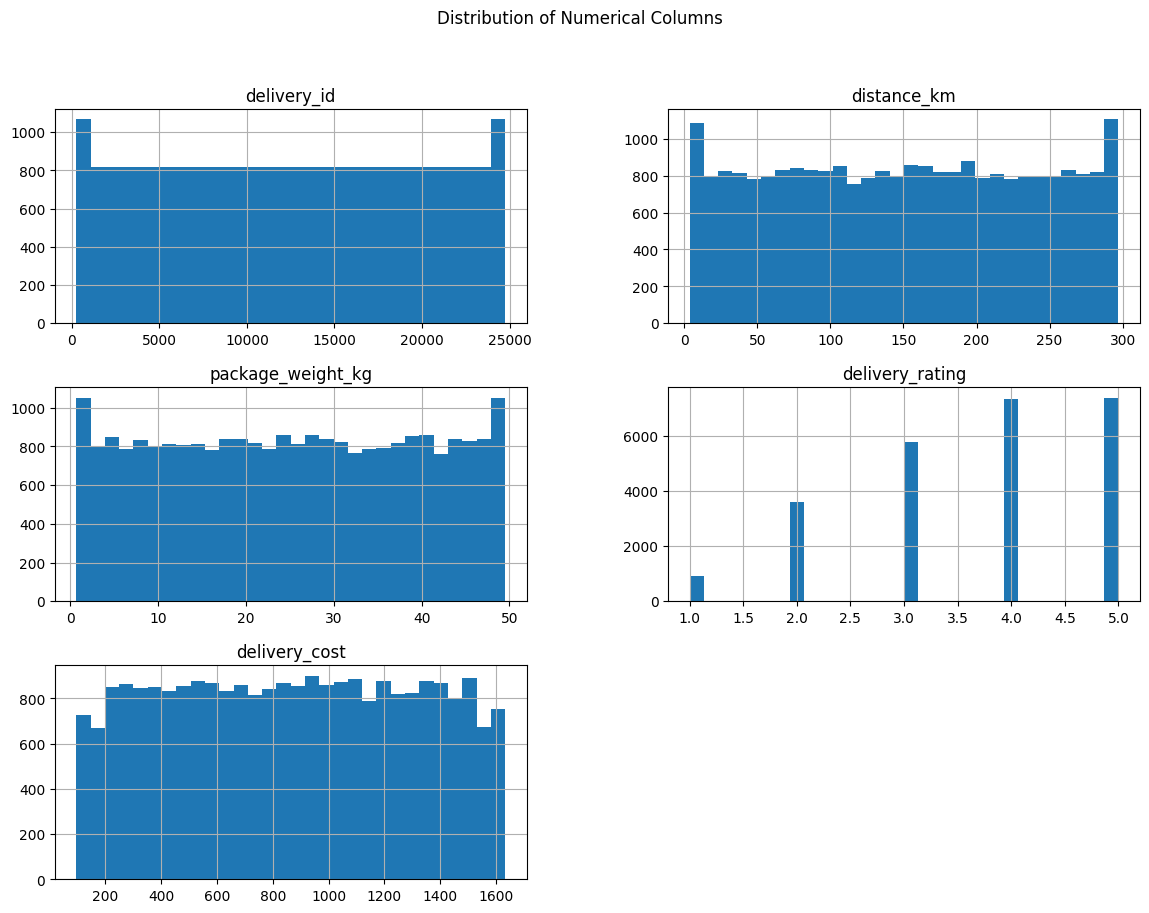

In [20]:
df[numeric_cols].hist(figsize=(14, 10), bins=30)
plt.suptitle("Distribution of Numerical Columns")
plt.show()


## Correlation

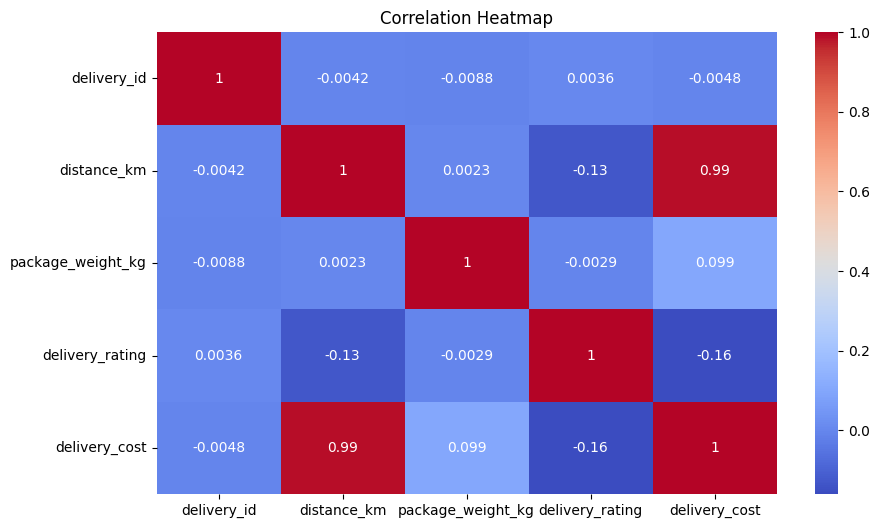

In [21]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Encoding data

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,1] = le.fit_transform(X[:,1])
X[:,2] = le.fit_transform(X[:,2])
X[:,3] = le.fit_transform(X[:,3])
X[:,4] = le.fit_transform(X[:,4])
X[:,5] = le.fit_transform(X[:,5])
X[:,6] = le.fit_transform(X[:,6])
X[:,9] = le.fit_transform(X[:,9])
X[:,10] = le.fit_transform(X[:,10])
print(X)

[[250.99 2 0 ... 0 1 3]
 [250.99 8 2 ... 0 1 5]
 [250.99 7 7 ... 0 1 4]
 ...
 [24750.01 5 1 ... 1 0 2]
 [24750.01 7 3 ... 0 1 5]
 [24750.01 1 8 ... 0 1 3]]


## Splitting the dataset into the Training set and Test set

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [24]:
print(X_train)

[[10264.0 1 5 ... 0 1 4]
 [18410.0 2 1 ... 0 1 3]
 [13048.0 1 6 ... 0 1 4]
 ...
 [9846.0 5 3 ... 1 0 2]
 [10800.0 2 7 ... 0 1 5]
 [2733.0 4 7 ... 0 1 5]]


In [25]:
print(y_train)

[ 948.25  944.22  349.25 ... 1162.19 1106.74  312.99]


In [26]:
print(X_test)
print(X_test[0])

[[14150.0 0 5 ... 0 1 3]
 [8947.0 2 7 ... 0 1 5]
 [22379.0 7 0 ... 1 0 2]
 ...
 [4719.0 3 8 ... 0 1 4]
 [9377.0 3 6 ... 0 1 4]
 [8020.0 7 1 ... 0 1 5]]
[14150.0 0 5 5 3 2 1 34.8 20.35 0 1 3]


In [27]:
print(y_test)

[ 235.05 1063.25 1196.85 ... 1441.6   610.09  559.8 ]


## Training the Random Forest Regressor model on the Training set

In [28]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators = 20, criterion = 'squared_error', random_state = 42,max_depth=10)
reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=20, random_state=42)

## Predicting a new result

In [29]:
print(reg.predict(np.array([[0.2302176725987584, 0, 5, 5, 3, 2, 1, 34.8, 20.35, 0, 1, -0.5767464430631692]])))

[234.74738492]


## Predicting the Test set results

In [30]:
y_pred = reg.predict(X_test)
act_pred=np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
print(act_pred)

[[ 234.74738492  235.05      ]
 [1060.04312874 1063.25      ]
 [1208.05004601 1196.85      ]
 ...
 [1436.9876     1441.6       ]
 [ 607.58184253  610.09      ]
 [ 560.23875812  559.8       ]]


## Evaluation

In [32]:
actual = act_pred[:, 0]
predicted = act_pred[:, 1]

absolute_error = np.abs(actual - predicted)
squared_error = (actual - predicted)**2
percentage_error = np.abs((actual - predicted) / actual) * 100

mean_absolute_error = np.mean(absolute_error)
mean_squared_error = np.mean(squared_error)
mean_percentage_error = np.mean(percentage_error)

print("Absolute Error:", absolute_error)
print("Squared Error:", squared_error)
print("Percentage Error:", percentage_error)
print("\nMean Absolute Error:", mean_absolute_error)
print("Mean Squared Error:", mean_squared_error)
print("Mean Percentage Error:", mean_percentage_error)

from sklearn.metrics import r2_score, mean_squared_error

print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Absolute Error: [ 0.30261508  3.20687126 11.20004601 ...  4.6124      2.50815747
  0.43875812]
Squared Error: [9.15758838e-02 1.02840233e+01 1.25441031e+02 ... 2.12742338e+01
 6.29085391e+00 1.92508685e-01]
Percentage Error: [0.12891095 0.30252272 0.92711772 ... 0.32097702 0.41280981 0.07831627]

Mean Absolute Error: 4.5055181192935105
Mean Squared Error: 35.54847225106078
Mean Percentage Error: 0.8039128643194036
R2 Score: 0.9998167426324918
RMSE: 5.9622539572766255


## Feature Scaling (Not Needed for Random Forest)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, [0,11]] = sc.fit_transform(X_train[:, [0,11]])
X_test[:, [0,11]] = sc.transform(X_test[:,[0,11]])